## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Cleaning 

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [7]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [8]:
df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [9]:
df['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited', nan], dtype=object)

In [10]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [11]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [12]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [13]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [14]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [15]:
## Checking the missing values
## features with missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]

In [16]:
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [17]:
for features in features_with_na:
    print(features,np.round(df[features].isnull().mean()*100,5),'% missing Values')

Age 4.62357 % missing Values
TypeofContact 0.51146 % missing Values
DurationOfPitch 5.13502 % missing Values
NumberOfFollowups 0.92062 % missing Values
PreferredPropertyStar 0.53191 % missing Values
NumberOfTrips 2.86416 % missing Values
NumberOfChildrenVisiting 1.35025 % missing Values
MonthlyIncome 4.76678 % missing Values


In [18]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values
1. impute Median value for Age column
2. impute Mode for TypeofContact column
3. impute Median for DurationofPitch
4. impute Mode for NumberOfFollowups as it is Descrete feature
5. impute Mode for PrefreedPropertyStar
6. impute Median for NumberofTrips 
7. impute mode for NumberofChildernVisting
8. impute median for MonthlyIncome

In [19]:
## 1. Age
df['Age'].fillna(df['Age'].median(),inplace=True)

## 2. TypeofContact
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)

## 3. DurationofPitch
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)

## 4. NumberofFollowups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)

## 5. PrefferdPropertyStar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)

## 6. NumberodTrips
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)

## 7. NumberofChildernVisting
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)

## 8. MonthlyIncome
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

In [20]:
df['TypeofContact'].mode()[0]

'Self Enquiry'

In [21]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [23]:
df.drop('CustomerID',inplace=True,axis=1)

In [24]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Feature Engineering

In [25]:
## Create a new column for features
df['TotalVisiting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']

In [26]:
df.drop(['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True , axis=1)

In [27]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [28]:
df['Gender'].dtype

dtype('O')

In [29]:
## Get all the Numerical Features
num_features=[features for features in df.columns if df[features].dtype !='O']
print('Number of numerical Features :',len(num_features))

Number of numerical Features : 12


In [30]:
## Categorical Features
cat_features=[features for features in df.columns if df[features].dtype =='O']
print('Number of Categorical Features :',len(cat_features))

Number of Categorical Features : 6


In [31]:
## Discrete features
discrete_fetures=[feature for feature in num_features if len(df[feature].unique())<=25 ]
print("Number of Discrete Features :", len(discrete_fetures))

Number of Discrete Features : 9


In [32]:
## Continuous Features
continuous_features=[feature for feature in num_features if feature not in discrete_fetures]
print("Number of Continuous Features :",len(continuous_features))

Number of Continuous Features : 3


## Train Test Split And Model Training

In [33]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [34]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']


In [35]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [36]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [37]:
## Seprate the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((3666, 17), (1222, 17))

In [38]:
## Create Column Transformer with 3 types of transformer
cat_features= X.select_dtypes(include='object').columns
num_features=X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features) 
    ]
)

In [39]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [40]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [41]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,0.277912,1.777611,2.053422,1.575272,0.681958,-1.273702,-0.415942,-0.058810
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.721708,-0.165525,-0.723883,-0.724971,-0.670111,-0.634811,1.409353,0.785113,-0.224146,-0.768009
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.287473,1.279708,0.526320,1.508716,-0.634811,0.681958,0.785113,-0.711215,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.454995,-0.531370,0.277912,1.777611,-0.670111,-0.634811,1.409353,0.785113,0.057482,-0.058810
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721708,0.322268,-0.723883,-0.724971,-0.670111,1.575272,0.681958,0.785113,-1.139911,-0.058810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721708,-0.653318,1.279708,-0.724971,-0.670111,-0.634811,-1.500228,0.785113,-0.531928,0.650390
3662,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.454995,-0.897214,-0.723883,1.777611,-1.214818,-0.634811,1.409353,0.785113,1.528543,-0.058810
3663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.454995,1.541750,0.277912,-0.724971,2.053422,-0.634811,-0.772833,0.785113,-0.356053,0.650390
3664,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.454995,1.785647,1.279708,-0.724971,-0.125404,-0.634811,-1.500228,0.785113,-0.248595,0.650390


In [42]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.454995,-0.287473,1.279708,-0.724971,-1.214818,-0.634811,-0.772833,-1.273702,-0.731873,-0.768009
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366643,-0.531370,0.277912,0.526320,-1.214818,1.575272,1.409353,-1.273702,-0.664972,-0.058810
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.454995,0.810061,0.277912,-0.724971,0.964009,-0.634811,1.409353,0.785113,-0.416131,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721708,2.517336,2.281503,-0.724971,1.508716,-0.634811,-0.045437,0.785113,-0.109865,0.650390
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.454995,-1.019163,0.277912,0.526320,-0.125404,1.575272,0.681958,0.785113,-0.312653,2.068789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.721708,0.200320,0.277912,1.777611,-0.125404,1.575272,-0.045437,0.785113,2.315245,0.650390
1218,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.454995,0.200320,-0.723883,-0.724971,0.419302,-0.634811,0.681958,0.785113,1.728488,-0.768009
1219,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.454995,-0.287473,0.277912,-0.724971,-1.214818,-0.634811,-0.772833,0.785113,-0.224146,-0.768009
1220,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721708,1.541750,-1.725679,0.526320,-0.125404,-0.634811,-1.500228,0.785113,-0.535150,1.359589


## Random Forest Classifier Training

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [44]:
models={
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)   ## Train model
    
    ## Make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    ## Training set performance
    
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    ## Test set performance
    
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    
    print("Model Performance for Training Dataset")
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1 Score : {:.4f}".format(model_train_f1))
    print("- Precision : {:.4f}".format(model_train_precision))
    print("- Recall : {:.4f}".format(model_train_recall))
    print("- Roc Auc Score : {:.4f}".format(model_train_rocauc_score))
    
    print('-'*40)
    
    print("Model Performance for Test Dataset")
    print("- Accuracy : {:.4f}".format(model_test_accuracy))
    print("- F1 Score : {:.4f}".format(model_test_f1))
    print("- Precision : {:.4f}".format(model_test_precision))
    print("- Recall : {:.4f}".format(model_test_recall))
    print("- Roc Auc Score : {:.4f}".format(model_test_rocauc_score))
    
    print('='*40)
    print('\n')
    


    
    

Random Forest
Model Performance for Training Dataset
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
----------------------------------------
Model Performance for Test Dataset
- Accuracy : 0.9288
- F1 Score : 0.9235
- Precision : 0.9416
- Recall : 0.6502
- Roc Auc Score : 0.8206


Decision Tree
Model Performance for Training Dataset
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
----------------------------------------
Model Performance for Test Dataset
- Accuracy : 0.9059
- F1 Score : 0.9066
- Precision : 0.7328
- Recall : 0.7623
- Roc Auc Score : 0.8501




In [45]:
## Hyperparameter Tunning

params={
    'max_depth': [5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

In [46]:
params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [47]:
## Models list for Hyperparameter Tunning
randomcv_model=[
    ("RF",RandomForestClassifier(),params)
]

In [48]:
randomcv_model

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [49]:
from sklearn.model_selection import RandomizedSearchCV

model_param= {}
for name,model,params in randomcv_model:
    random=RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-------------Best Params for {model_name}-----------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-------------Best Params for RF-----------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [53]:
models={
    'Random Forest': RandomForestClassifier(n_estimators=500,min_samples_split= 2,max_features= 8,max_depth=None),
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)   ## Train model
    
    ## Make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    ## Training set performance
    
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)
    
    ## Test set performance
    
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)
    
    
    print(list(models.keys())[i])
    
    print("Model Performance for Training Dataset")
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1 Score : {:.4f}".format(model_train_f1))
    print("- Precision : {:.4f}".format(model_train_precision))
    print("- Recall : {:.4f}".format(model_train_recall))
    print("- Roc Auc Score : {:.4f}".format(model_train_rocauc_score))
    
    print('-'*40)
    
    print("Model Performance for Test Dataset")
    print("- Accuracy : {:.4f}".format(model_test_accuracy))
    print("- F1 Score : {:.4f}".format(model_test_f1))
    print("- Precision : {:.4f}".format(model_test_precision))
    print("- Recall : {:.4f}".format(model_test_recall))
    print("- Roc Auc Score : {:.4f}".format(model_test_rocauc_score))
    
    print('='*40)
    print('\n')
    


    
    

Random Forest
Model Performance for Training Dataset
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
----------------------------------------
Model Performance for Test Dataset
- Accuracy : 0.9362
- F1 Score : 0.9318
- Precision : 0.9560
- Recall : 0.6816
- Roc Auc Score : 0.8373




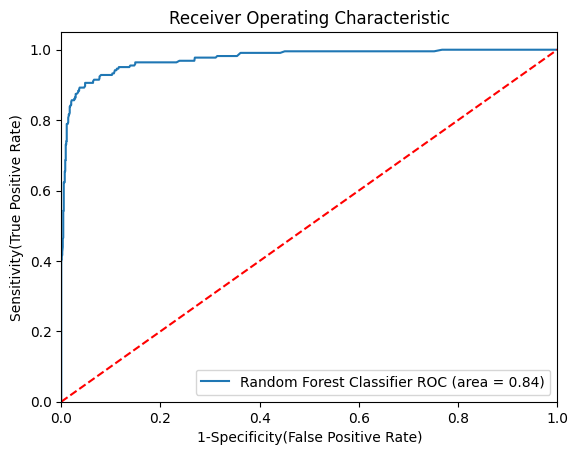

In [56]:
## Plot Roc Auc Curve 
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

## add the models to the list that you want to view on the ROC plot

auc_models=[
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators= 500,min_samples_split= 2,max_features= 8,max_depth=None),
        'auc': 0.8373
    }
]

## Create loop through all model
for algo in auc_models:
    model=algo['model']  ## select the model
    model.fit(X_train,y_train)
    
## compute false positive rate and True positive rate
    fpr,tpr,thresholds=roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()       